You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [291]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1
5,2023-10-01,67,3,1
6,2023-10-08,68,4,1
7,2023-10-15,69,4,1
8,2023-10-22,71,4,2
9,2023-10-29,69,3,2


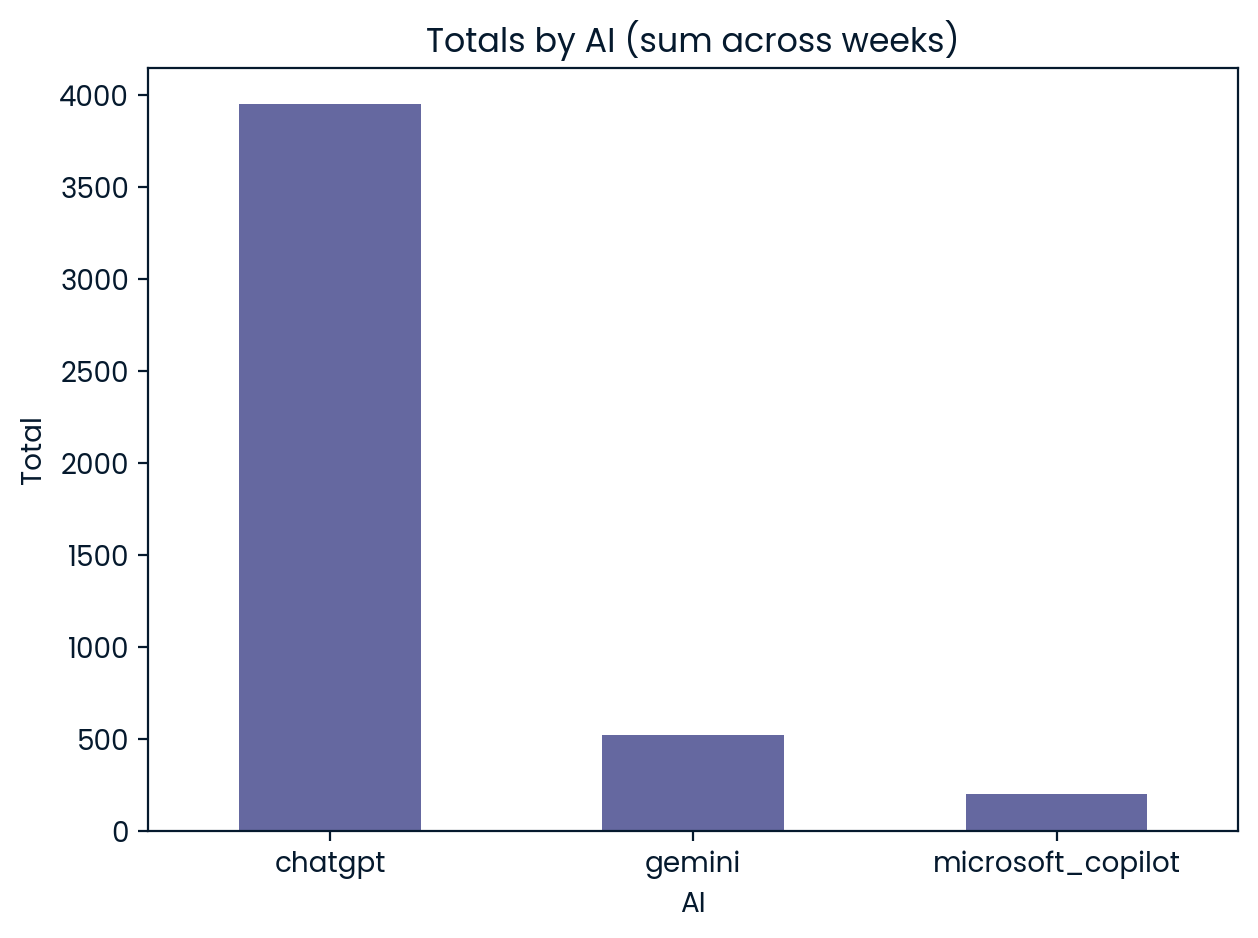

In [292]:
# Start coding here
# Use as many cells as you need

ai_cols = ["chatgpt", "gemini", "microsoft_copilot"]
totals = trends[ai_cols].sum().sort_values(ascending=False)
df = trends

ax = totals.plot(kind="bar", rot=0)
ax.set_xlabel("AI")
ax.set_ylabel("Total")
ax.set_title("Totals by AI (sum across weeks)")
plt.tight_layout(); plt.show()
    



In [293]:
# Calculate weekly percentage change for each AI tool
pct_change = trends[ai_cols].pct_change().fillna(0).mul(100)


In [294]:
# Calculate the standard deviation of the growth rates for each tool
std_devs = pct_change.std()

In [295]:
# Identify the most consistent tool (lowest standard deviation)
most_consistent_tool = std_devs.idxmin()
most_consistent_tool, std_devs[most_consistent_tool]

('chatgpt', 8.966295553908404)

make a line chart with all three ai services over the entire time period

Let's visualize the usage trends of all three AI services over the entire time period using a line chart.

In [296]:
import plotly.graph_objs as go
from IPython.display import display

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['week'], y=df['chatgpt'], mode='lines', name='ChatGPT'))
fig.add_trace(go.Scatter(x=df['week'], y=df['gemini'], mode='lines', name='Gemini'))
fig.add_trace(go.Scatter(x=df['week'], y=df['microsoft_copilot'], mode='lines', name='Microsoft Copilot'))

fig.update_layout(
    title='AI Service Usage Over Time',
    xaxis_title='Week',
    yaxis_title='Usage',
    legend_title='AI Service',
    template='plotly_white'
)

fig.show()

In [297]:
first_dip = df.set_index('week').at['2023-11-26', 'chatgpt'] - df.set_index('week').at['2023-12-24', 'chatgpt']
second_dip = df.set_index('week').at['2024-06-02', 'chatgpt'] - df.set_index('week').at['2024-07-07', 'chatgpt']
gpt_dip_amount = max(first_dip, second_dip)
gpt_dip = 'December 2023'
print(gpt_dip)

December 2023


In [298]:
df["week"] = pd.to_datetime(df["week"])  # required for resample
df = df.set_index("week").resample('M').mean()
df.resample('M')
df['avg_across_tools'] = df.mean(axis=1)
best_month_values = df.sort_values('avg_across_tools', ascending=False)
print(best_month_values)
best_month = best_month_values.index[0].strftime("%B")
print(best_month)


            chatgpt  gemini  microsoft_copilot  avg_across_tools
week                                                            
2024-05-31    86.25   16.00               5.00         35.750000
2024-08-31    86.00   14.75               4.25         35.000000
2024-04-30    80.75   13.50               5.50         33.250000
2024-06-30    78.20   14.80               4.60         32.533333
2024-09-30    77.00   14.00               3.00         31.333333
2024-03-31    74.40   12.80               6.00         31.066667
2024-02-29    73.25   12.25               5.25         30.250000
2024-07-31    66.50   12.75               3.50         27.583333
2023-11-30    75.25    3.00               2.25         26.833333
2024-01-31    66.25    4.00               3.75         24.666667
2023-10-31    68.80    3.60               1.40         24.600000
2023-12-31    64.40    6.80               2.60         24.600000
2023-09-30    62.25    3.00               1.00         22.083333
2023-08-31    56.00    3.